## Importing Libs

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import json
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
import highlight_text
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer import Pitch, VerticalPitch
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
from matplotlib.patches import Rectangle
import matplotlib.font_manager as font_manager
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
#import soccerdata as sd
import re
from unidecode import unidecode
from scipy.spatial import ConvexHull
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import ax_text, fig_text


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import main
import visuals
import seaborn as sns
import requests
import utils
import os
%load_ext autoreload
%autoreload 2

pd.set_option("display.max_rows", None, "display.max_columns", None)
background = "black"
text_color = 'black'
primary = '#C8102E'
secondary = 'lightblue'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

In [2]:
import matplotlib.font_manager as fm
from mplsoccer import FontManager

# Set the path to the locally downloaded font file
font_path = r'C:\Users\acer\Documents\GitHub\IndianCitizen\ScorePredict\Score Logos-20241022T100701Z-001\Score Logos\Sora_Font\Sora-Regular.ttf'

# Add the font to matplotlib
font_prop = fm.FontProperties(fname=font_path)

# You can now use this font in your plots
fm_sora = FontManager()
#fm_sora.prop = font_prop

print("Font loaded and registered successfully!")

Font loaded and registered successfully!


In [3]:
from sqlalchemy import create_engine
import psycopg2

# Database connection settings (replace with your credentials)
db_config = {
    'dbname': 'understat_shots_db',
    'user': 'ichadha',
    'password': 'ichadhapg',
    'host': 'localhost',
    'port': 5432,
}

# Create a connection engine
engine = create_engine(f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}")

## Shot of the Week

### Creating DataFrame

In [94]:
goal_low_xg = """select round("xG" :: numeric ,4) xg,"result",player,situation,h_team,a_team,league,h_a,"minute",date,player_assisted,"lastAction","X","Y"
from understat_shots_tb
where "date" > current_date - 7
and "result" = 'Goal'
order by "xG" 
limit 1;"""

with engine.connect() as conn:
    df_goal_low_xg = pd.read_sql(goal_low_xg, conn)

In [95]:
df_goal_low_xg['xGOT'] = 0.31

In [28]:
if __name__ == "__main__":
    driver = webdriver.Chrome()
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://1xbet.whoscored.com/Matches/1821570/Live/Spain-LaLiga-2024-2025-Rayo-Vallecano-Real-Madrid"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: Spain, League: LaLiga, Season: 2024/2025, Match Id: 1821570


In [43]:
events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Federico Valverde')]

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,matchId,startDate,startTime,score,ftScore,htScore,etScore,venueName,maxMinute,playerId,playerName,goalMouthZ,goalMouthY,isShot,endX,endY,relatedEventId,relatedPlayerId,isGoal,blockedX,blockedY,cardType,shotBodyType,situation,shotSixYardBox,shotPenaltyArea,shotOboxTotal,shotOpenPlay,shotCounter,shotSetPiece,shotDirectCorner,shotOffTarget,shotOnPost,shotOnTarget,shotsTotal,shotBlocked,shotRightFoot,shotLeftFoot,shotHead,shotObp,goalSixYardBox,goalPenaltyArea,goalObox,goalOpenPlay,goalCounter,goalSetPiece,penaltyScored,goalOwn,goalNormal,goalRightFoot,goalLeftFoot,goalHead,goalObp,shortPassInaccurate,shortPassAccurate,passCorner,passCornerAccurate,passCornerInaccurate,passFreekick,passBack,passForward,passLeft,passRight,keyPassLong,keyPassShort,keyPassCross,keyPassCorner,keyPassThroughball,keyPassFreekick,keyPassThrowin,keyPassOther,assistCross,assistCorner,assistThroughball,assistFreekick,assistThrowin,assistOther,dribbleLost,dribbleWon,challengeLost,interceptionWon,clearanceHead,outfielderBlock,passCrossBlockedDefensive,outfielderBlockedPass,offsideGiven,offsideProvoked,foulGiven,foulCommitted,yellowCard,voidYellowCard,secondYellow,redCard,turnover,dispossessed,saveLowLeft,saveHighLeft,saveLowCentre,saveHighCentre,saveLowRight,saveHighRight,saveHands,saveFeet,saveObp,saveSixYardBox,savePenaltyArea,saveObox,keeperDivingSave,standingSave,closeMissHigh,closeMissHighLeft,closeMissHighRight,closeMissLeft,closeMissRight,shotOffTargetInsideBox,touches,assist,ballRecovery,clearanceEffective,clearanceTotal,clearanceOffTheLine,dribbleLastman,errorLeadsToGoal,errorLeadsToShot,intentionalAssist,interceptionAll,interceptionIntheBox,keeperClaimHighLost,keeperClaimHighWon,keeperClaimLost,keeperClaimWon,keeperOneToOneWon,parriedDanger,parriedSafe,collected,keeperPenaltySaved,keeperSaveInTheBox,keeperSaveTotal,keeperSmother,keeperSweeperLost,keeperMissed,passAccurate,passBackZoneInaccurate,passForwardZoneAccurate,passInaccurate,passAccuracy,cornerAwarded,passKey,passChipped,passCrossAccurate,passCrossInaccurate,passLongBallAccurate,passLongBallInaccurate,passThroughBallAccurate,passThroughBallInaccurate,passThroughBallInacurate,passFreekickAccurate,passFreekickInaccurate,penaltyConceded,penaltyMissed,penaltyWon,passRightFoot,passLeftFoot,passHead,sixYardBlock,tackleLastMan,tackleLost,tackleWon,cleanSheetGK,cleanSheetDL,cleanSheetDC,cleanSheetDR,cleanSheetDML,cleanSheetDMC,cleanSheetDMR,cleanSheetML,cleanSheetMC,cleanSheetMR,cleanSheetAML,cleanSheetAMC,cleanSheetAMR,cleanSheetFWL,cleanSheetFW,cleanSheetFWR,cleanSheetSub,goalConcededByTeamGK,goalConcededByTeamDL,goalConcededByTeamDC,goalConcededByTeamDR,goalConcededByTeamDML,goalConcededByTeamDMC,goalConcededByTeamDMR,goalConcededByTeamML,goalConcededByTeamMC,goalConcededByTeamMR,goalConcededByTeamAML,goalConcededByTeamAMC,goalConcededByTeamAMR,goalConcededByTeamFWL,goalConcededByTeamFW,goalConcededByTeamFWR,goalConcededByTeamSub,goalConcededOutsideBoxGoalkeeper,goalScoredByTeamGK,goalScoredByTeamDL,goalScoredByTeamDC,goalScoredByTeamDR,goalScoredByTeamDML,goalScoredByTeamDMC,goalScoredByTeamDMR,goalScoredByTeamML,goalScoredByTeamMC,goalScoredByTeamMR,goalScoredByTeamAML,goalScoredByTeamAMC,goalScoredByTeamAMR,goalScoredByTeamFWL,goalScoredByTeamFW,goalScoredByTeamFWR,goalScoredByTeamSub,aerialSuccess,duelAerialWon,duelAerialLost,offensiveDuel,defensiveDuel,bigChanceMissed,bigChanceScored,bigChanceCreated,overrun,successfulFinalThirdPasses,punches,penaltyShootoutScored,penaltyShootoutMissedOffTarget,penaltyShootoutSaved,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos
647,2.759203e+09,416,38,33.0,52,a,74.2,34.8,38,FirstHalf,Goal,Successful,"[{'type': 'LowLeft'}, {'type': 'GoalMouthY', '...","[touches, goalNormal, shotOnTarget, shotsTotal...",True,1821570,2024-12-14T00:00:00,2024-12-14T20:00:00,3 : 3,3 : 3,2 : 2,,Estadio

In [96]:
df_goal_low_xg['goalMouthZ'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Federico Valverde')]['goalMouthZ'].iloc[0]
df_goal_low_xg['goalMouthY'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Federico Valverde')]['goalMouthY'].iloc[0]
df_goal_low_xg['second'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Federico Valverde')]['second'].iloc[0]
df_goal_low_xg['score'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Federico Valverde')]['score'].iloc[0]
df_goal_low_xg['venueName'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Federico Valverde')]['venueName'].iloc[0]

### Plotting

In [97]:
df_goal_low_xg

,xg,result,player,situation,h_team,a_team,league,h_a,minute,date,player_assisted,lastAction,X,Y,xGOT,goalMouthZ,goalMouthY,second,score,venueName
0,0.0136,Goal,Federico Valverde,OpenPlay,Rayo Vallecano,Real Madrid,La_Liga,a,38,2024-12-14 20:00:00,Arda Güler,Pass,0.742,0.348,0.31,8.2,53.8,33.0,3 : 3,Estadio de Vallecas


In [62]:
df_goal_low_xg.columns

Index(['xg', 'result', 'player', 'situation', 'h_team', 'a_team', 'league',
       'h_a', 'minute', 'date', 'player_assisted', 'lastAction', 'X', 'Y',
       'xGOT', 'goalMouthZ', 'goalMouthY', 'second', 'score', 'venueName'],
      dtype='object')

In [504]:
df_goal_low_xg['date'].iloc[0].date()

datetime.date(2024, 12, 14)

In [516]:
def plot_goal_low_xg(df):
    teamcolor = '#FEBE10'
    #background = 'green'
    #df['X'] = (df['X'] / 100) * 105 * 100
    #df['Y'] = (df['Y'] / 100) * 68 * 100
    
    pitch = VerticalPitch(
    pitch_type='uefa',
    goal_type = 'box',
    half=True, 
    pitch_color=background, 
    stripe=False,
    pad_bottom=.5, 
    line_color='white',
    linewidth=.5,
    axis=True, 
    label=True
    )

    # create a subplot with 2 rows and 1 column
    fig = plt.figure(figsize=(9, 12))
    fig.patch.set_facecolor(background)

    ax1 = fig.add_axes([0, 0.7, 1, .2])
    ax1.set_facecolor(background)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    ax1.text(
        x=0.29, 
        y=.9, 
        s='Shot Of The Week', 
        fontsize=28, 
        fontproperties=font_prop,  
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.37, 
        y=0.6, 
        s=f"Match - {df['h_team'].iloc[0]} v {df['a_team'].iloc[0]} ({df['league'].iloc[0]})", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.2, 
        y=0.4, 
        s=f"Date - {df['date'].iloc[0].date()}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )
    
    ax1.text(
        x=0.815, 
        y=.6, 
        s=f"Time - {df['minute'].iloc[0]} : {df['second'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.25, 
        y=.2, 
        s=f"Player - {df['player'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.8, 
        y=.4, 
        s=f"Final Score - {df['score'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

    ax_image = add_image(
        logo, fig, left=0.82, bottom=0.85, width=0.08, height=0.08,aspect='equal'
    )
    

    ax1.set_axis_off()

    
    ax2 = fig.add_axes([.05, 0.25, .9, .5])
    ax2.set_facecolor(background)
    
    pitch.draw(ax=ax2)

    pitch.scatter(
        df['X'].iloc[0], 
        df['Y'].iloc[0], 
        s=50000 * df['xg'].iloc[0], 
        c=background,
        marker='football',
        ax=ax2,
        alpha=.7,
        linewidths=.8,
        edgecolors=teamcolor
    )
    pitch.annotate(f"xG - {df['xg'].iloc[0]}",
        xy=(df['X'].iloc[0],df['Y'].iloc[0]+12),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )
    pitch.annotate(f"xGOT - {df['xGOT'].iloc[0]}",
        xy=(df['X'].iloc[0]-5,df['Y'].iloc[0]+12),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )

    pitch.annotate(f"Situation - {df['situation'].iloc[0]}",
        xy=(df['X'].iloc[0]-10,df['Y'].iloc[0]+12),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )

    pitch.arrows(
        df['X'].iloc[0], df['Y'].iloc[0],105,34,
        width=1.5,alpha=0.8,zorder=3,
        headwidth=8, headlength=5, color='white',
        ax=ax2
    )

    

        
    ax2.set_axis_off()
    
    # add another axis for the stats
    ax3 = fig.add_axes([0, 0.2, 1, .05])
    ax3.set_facecolor(background)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)

    ax3.text(
        x=0.1, 
        y=0, 
        s=f"Assisted By : {df['player_assisted'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.7, 
        y=0, 
        s=f"Last Action : {df['lastAction'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )


    ax3.set_axis_off()

    plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/ShotOfTheWeek.png',dpi=500,bbox_inches = 'tight',facecolor=background)


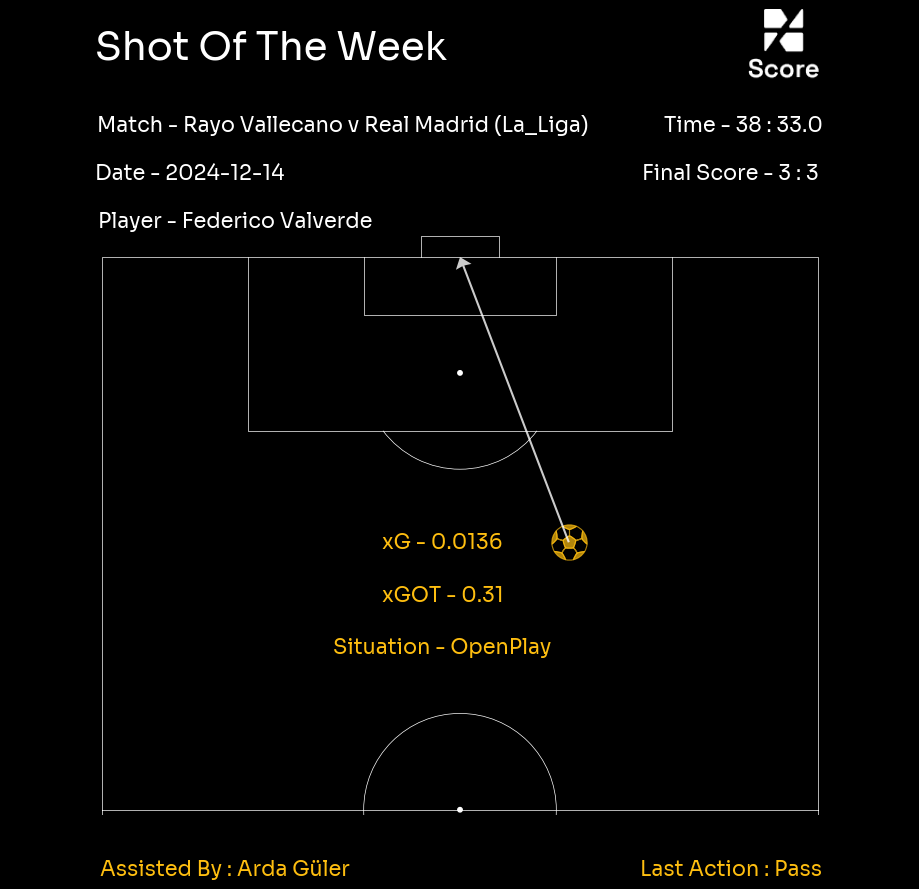

In [522]:
plot_goal_low_xg(df_goal_low_xg)

## Miss of the Week

### Creating DataFrame

In [472]:
miss_high_xg = """select round("xG" :: numeric ,4) xg,"result",player,situation,h_team,a_team,league,h_a,"minute",date,player_assisted,"lastAction","X","Y"
from understat_shots_tb
where "date" > current_date - 7
and "result" != 'Goal' and situation != 'Penalty'
order by "xG" desc 
limit 1;"""

with engine.connect() as conn:
    df_miss_high_xg = pd.read_sql(miss_high_xg, conn)

In [396]:
if __name__ == "__main__":
    driver = webdriver.Chrome()
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://1xbet.whoscored.com/Matches/1821223/Live/England-Premier-League-2024-2025-Wolves-Ipswich"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: England, League: Premier League, Season: 2024/2025, Match Id: 1821223


In [473]:
player = df_miss_high_xg['player'].iloc[0]
minute = df_miss_high_xg['minute'].iloc[0]

df_miss_high_xg['goalMouthZ'] = events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player) & (events_df['minute'] == minute)]['goalMouthZ'].iloc[0]
df_miss_high_xg['goalMouthY'] = events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player) & (events_df['minute'] == minute)]['goalMouthY'].iloc[0]
df_miss_high_xg['second'] = events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player) & (events_df['minute'] == minute)]['second'].iloc[0]
df_miss_high_xg['score'] = events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player) & (events_df['minute'] == minute)]['score'].iloc[0]
df_miss_high_xg['venueName'] =events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player) & (events_df['minute'] == minute)]['venueName'].iloc[0]


In [474]:
df_miss_high_xg

,xg,result,player,situation,h_team,a_team,league,h_a,minute,date,player_assisted,lastAction,X,Y,goalMouthZ,goalMouthY,second,score,venueName
0,0.706,BlockedShot,Omari Hutchinson,OpenPlay,Wolverhampton Wanderers,Ipswich,EPL,a,14,2024-12-14 15:00:00,Liam Delap,TakeOn,0.925,0.562,9.7,50.1,32.0,1 : 2,Molineux Stadium


### Plotting

In [523]:
def plot_miss_high_xg(df):
    teamcolor = '#004fc2'
    #background = 'green'
    df['X'] = (df['X'] / 100) * 105 * 100
    df['Y'] = (df['Y'] / 100) * 68 * 100
    
    pitch = VerticalPitch(
    pitch_type='uefa',
    goal_type = 'box',
    half=True, 
    pitch_color=background, 
    stripe=False,
    pad_bottom=.5, 
    line_color='white',
    linewidth=.5,
    axis=True, 
    label=True
    )

    # create a subplot with 2 rows and 1 column
    fig = plt.figure(figsize=(9, 12))
    fig.patch.set_facecolor(background)

    ax1 = fig.add_axes([0, 0.7, 1, .2])
    ax1.set_facecolor(background)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    ax1.text(
        x=0.29, 
        y=.9, 
        s='Miss Of The Week', 
        fontsize=28, 
        fontproperties=font_prop,  
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.39, 
        y=0.6, 
        s=f"Match - {df['h_team'].iloc[0]} v {df['a_team'].iloc[0]} ({df['league'].iloc[0]})", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )
    
    ax1.text(
        x=0.815, 
        y=.6, 
        s=f"Time - {df['minute'].iloc[0]} : {df['second'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.2, 
        y=0.4, 
        s=f"Date - {df['date'].iloc[0].date()}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.25, 
        y=.2, 
        s=f"Player - {df['player'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.8, 
        y=.4, 
        s=f"Final Score - {df['score'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

    ax_image = add_image(
        logo, fig, left=0.82, bottom=0.85, width=0.08, height=0.08,aspect='equal'
    )
    

    ax1.set_axis_off()

    
    ax2 = fig.add_axes([.05, 0.25, .9, .5])
    ax2.set_facecolor(background)
    
    pitch.draw(ax=ax2)

    pitch.scatter(
        df['X'].iloc[0], 
        df['Y'].iloc[0], 
        s=1000 * df['xg'].iloc[0], 
        color=teamcolor,
        marker='o',
        ax=ax2,
        alpha=.7,
        linewidths=.8,
        edgecolor='white'
    )
    pitch.annotate(f"xG - {df['xg'].iloc[0]}",
        xy=(df['X'].iloc[0]-15,df['Y'].iloc[0]+12),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )

    pitch.annotate(f"Situation - {df['situation'].iloc[0]}",
        xy=(df['X'].iloc[0]-20,df['Y'].iloc[0]+12),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )
    pitch.annotate(f"Result - {df['result'].iloc[0]}",
        xy=(df['X'].iloc[0]-25,df['Y'].iloc[0]+12),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )

    

        
    ax2.set_axis_off()
    
    # add another axis for the stats
    ax3 = fig.add_axes([0, 0.2, 1, .05])
    ax3.set_facecolor(background)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)

    ax3.text(
        x=0.1, 
        y=0, 
        s=f"Assisted By : {df['player_assisted'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.68, 
        y=0, 
        s=f"Last Action : {df['lastAction'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )


    ax3.set_axis_off()
    plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/MissOfTheWeek.png',dpi=500,bbox_inches = 'tight',facecolor=background)



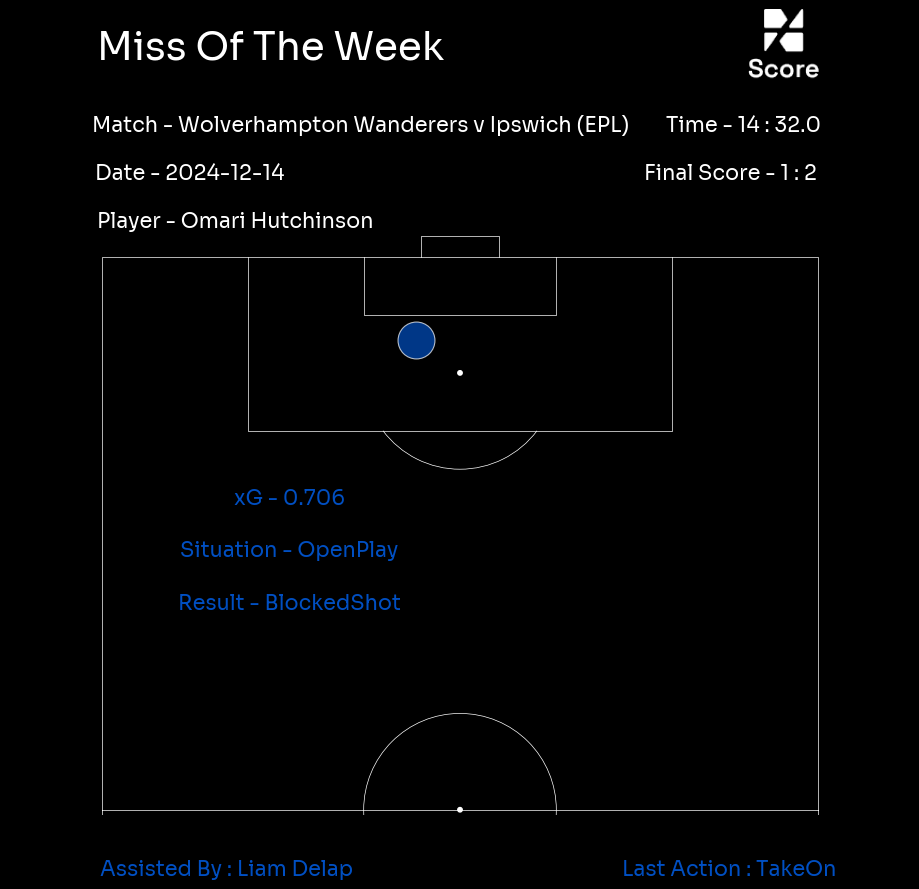

In [524]:
df_miss_high_xg1 = df_miss_high_xg.copy()
plot_miss_high_xg(df_miss_high_xg1)

## Goal Of the Week

## ShotMap - Top 9 Players Based on Number oof Shots Across Top 5 Leagues

In [525]:
#https://footsci.medium.com/plot-shots-goals-maps-with-python-mplsoccer-ranking-players-by-xg-shots-and-goals-per-90-16afa7c74b9a

In [649]:
query = """select player , count(*) as num_shots,
count(case when "result" = 'Goal' or "result" = 'SavedShot' or "result" = 'ShotOnPost' then 1 else null end) as num_shots_on_target,
count(case when "result" = 'Goal' then 1 else null end) as num_goals,
count(case when "result" = 'Goal' and situation != 'Penalty' then 1 else null end) as num_goals_non_penalty,
sum(round("xG" :: numeric ,2)) as total_xG,
sum(case when situation != 'Penalty' then round("xG" :: numeric ,2) else null end) as total_npxG
from understat_shots_tb ust
where season = '2024'
group by player
order by num_shots desc
limit 9;"""

with engine.connect() as conn:
    df_stats = pd.read_sql(query, conn)

In [757]:
df_stats

,player,num_shots,num_shots_on_target,num_goals,num_goals_non_penalty,total_xg,total_npxg,team
0,Erling Haaland,71,40,13,12,14.63,13.87,Man City
1,Kylian Mbappe-Lottin,69,35,9,6,12.43,9.47,Real Madrid
2,Antoine Semenyo,64,18,4,4,6.25,6.25,Bournemouth
3,Nikola Krstovic,63,21,4,3,6.51,4.99,Lecce
4,Omar Marmoush,59,31,13,11,8.79,7.27,Frankfurt
5,Robert Lewandowski,59,35,16,14,16.85,14.63,Barcelona
6,Cole Palmer,57,25,11,8,9.03,6.75,Chelsea
7,Raphinha,56,27,11,10,10.46,9.72,Barceolna
8,Valentín Castellanos,55,22,6,5,9.26,7.74,Lazio


In [758]:
df_stats['team'] = ['Man City','Real Madrid','Bournemouth','Lecce','Frankfurt','Barcelona','Chelsea','Barcelona','Lazio']

In [651]:
query_shots = """ select "result","X","Y",situation,"shotType",player from understat_shots_tb ust
where season = '2024' and 
player in (select player from

(select player , count(*) as num_shots,
count(case when "result" = 'Goal' or "result" = 'SavedShot' or "result" = 'ShotOnPost' then 1 else null end) as num_shots_on_target,
count(case when "result" = 'Goal' then 1 else null end) as num_goals,
count(case when "result" = 'Goal' and situation != 'Penalty' then 1 else null end) as num_goals_non_penalty,
sum(round("xG" :: numeric ,2)) as total_xG,
sum(case when situation != 'Penalty' then round("xG" :: numeric ,2) else null end) as total_npxG
from understat_shots_tb ust
where season = '2024'
group by player
order by num_shots desc
limit 9) players);"""

with engine.connect() as conn:
    df_shots = pd.read_sql(query_shots, conn)

In [652]:
df_shots['player'].value_counts()

player
Erling Haaland          71
Kylian Mbappe-Lottin    69
Antoine Semenyo         64
Nikola Krstovic         63
Robert Lewandowski      59
Omar Marmoush           59
Cole Palmer             57
Raphinha                56
Valentín Castellanos    55
Name: count, dtype: int64

In [654]:
df = df_shots.copy()
df['X'] = (df['X'] / 100) * 105 * 100
df['Y'] = (df['Y'] / 100) * 68 * 100

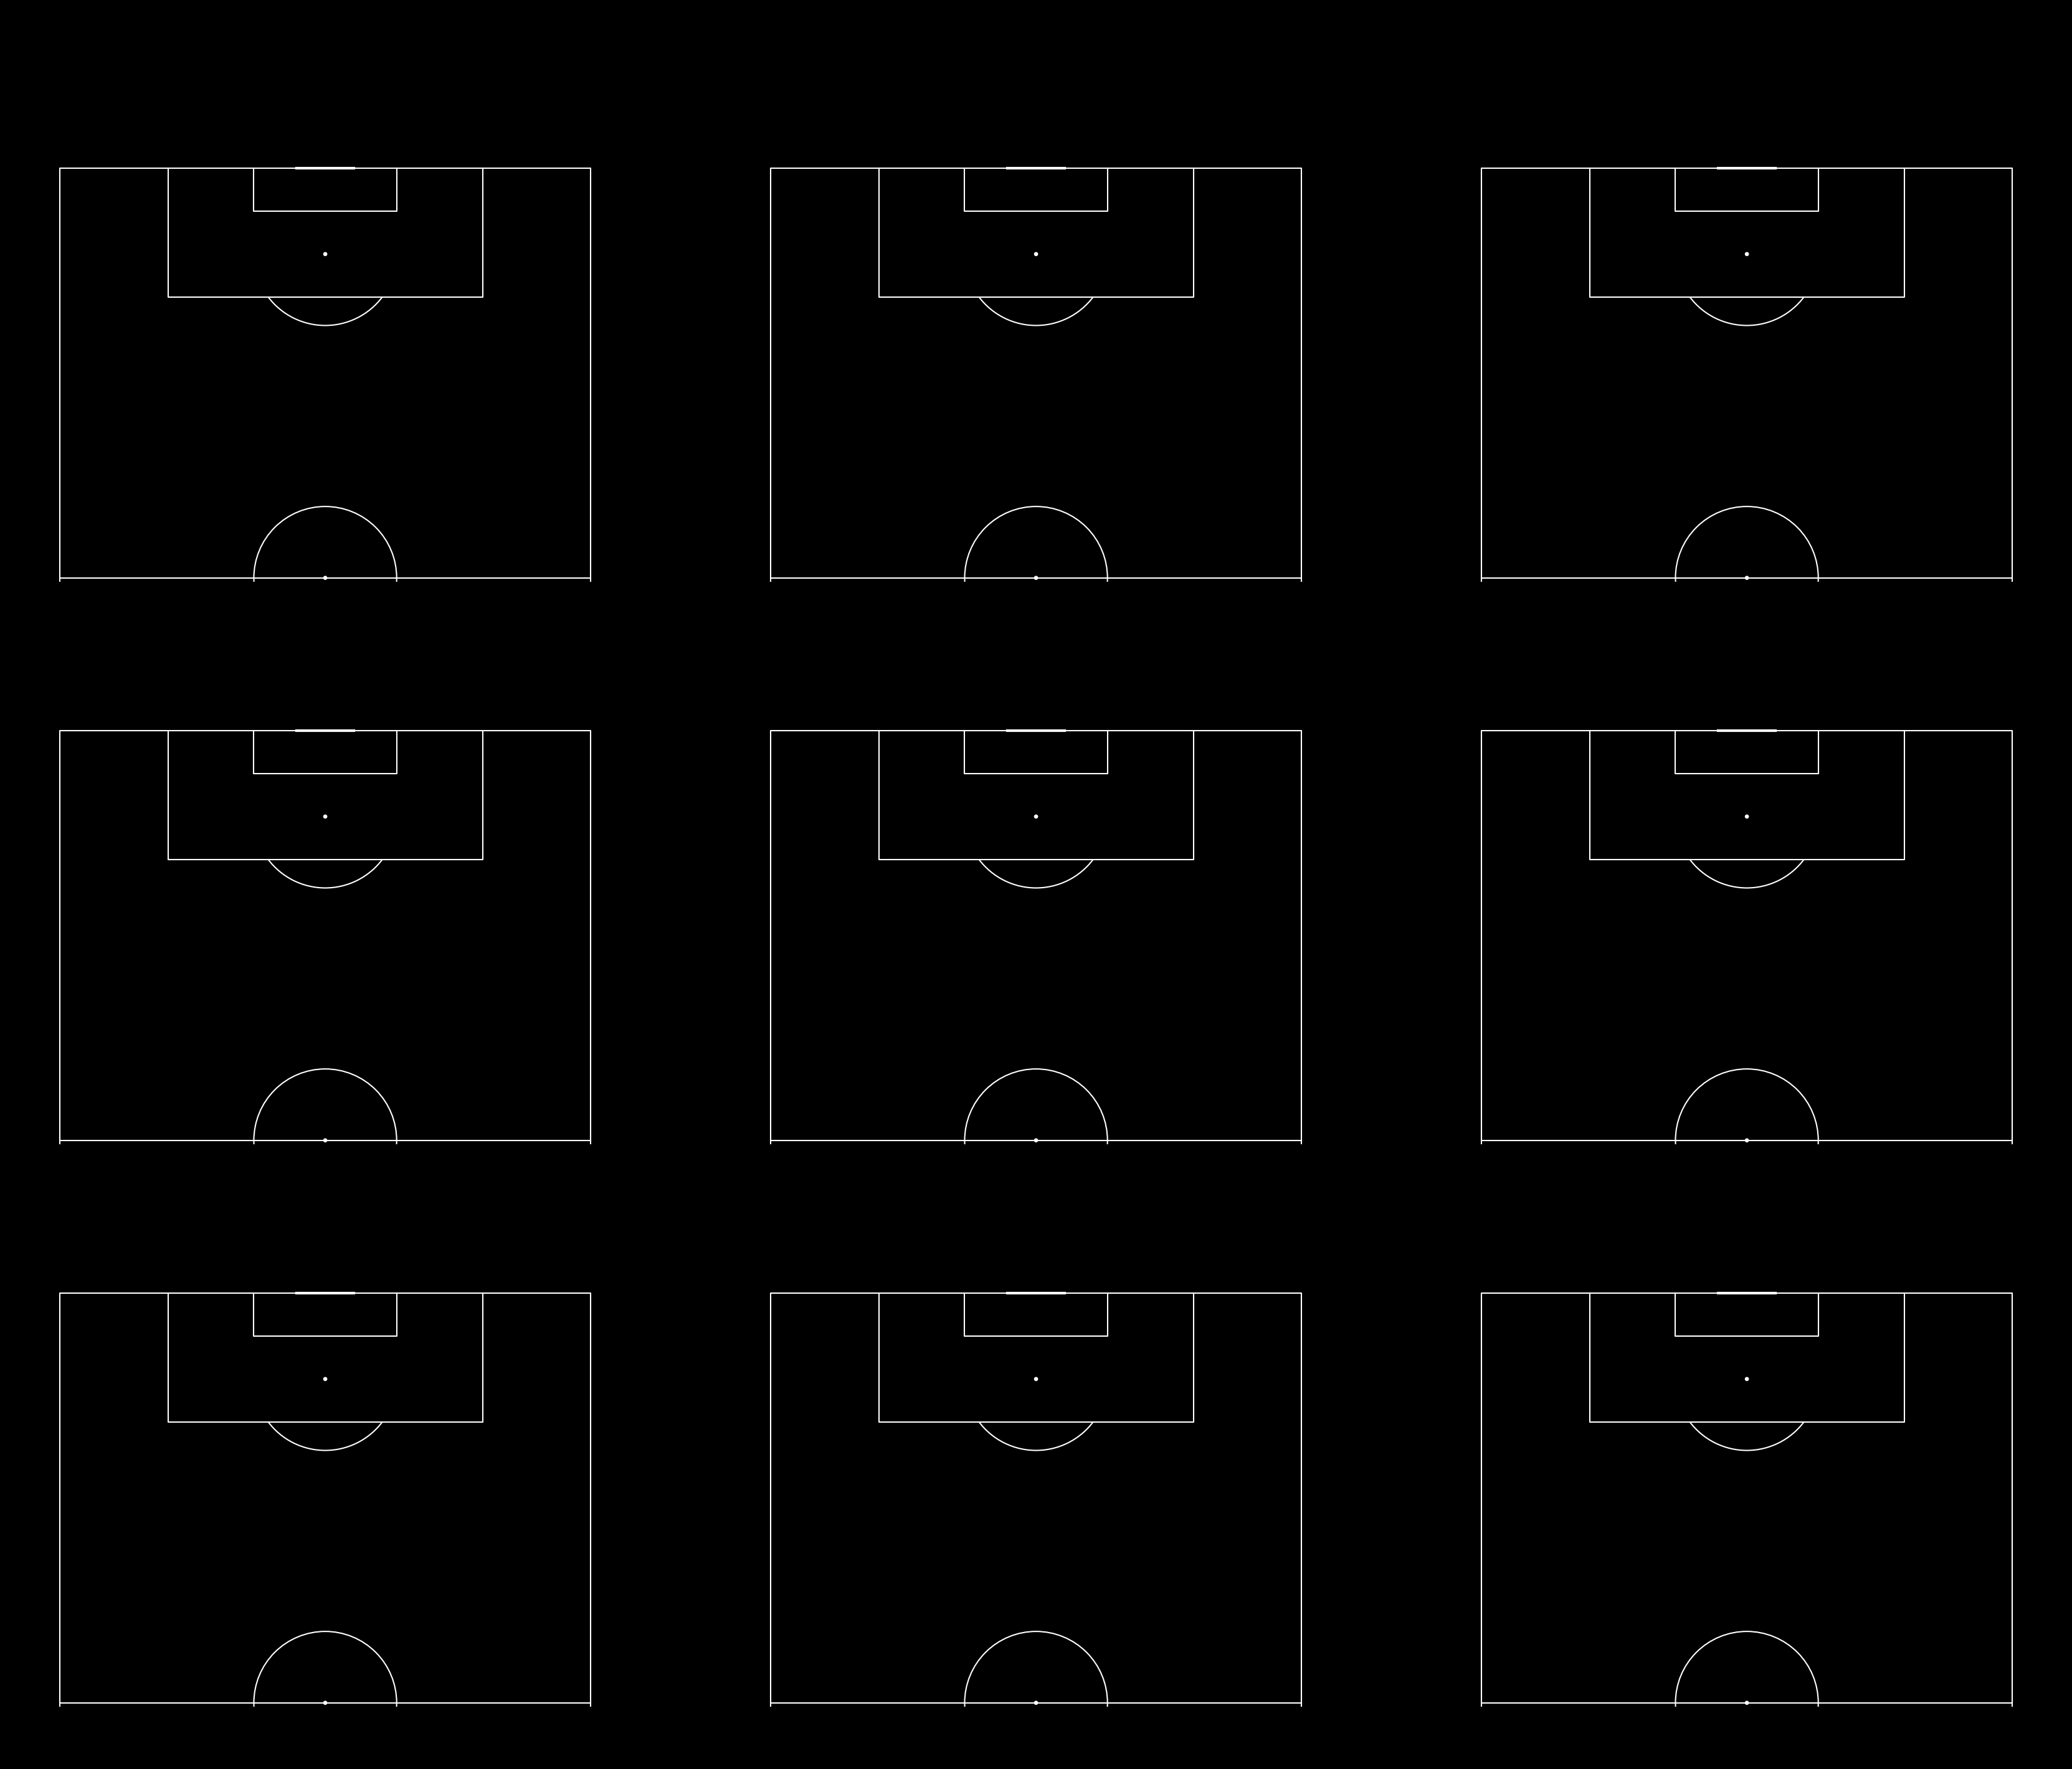

In [594]:
warnings.simplefilter("ignore", UserWarning)
pitch = VerticalPitch(
    pitch_type='uefa',
    goal_type = 'line',
    half=True, 
    pitch_color=background, 
    stripe=False,
    pad_bottom=.5, 
    line_color='white',
    linewidth=1.5,
    axis=False, 
    label=True,
    line_zorder=2
    )
# plot the 3 * 3 grid
fig, axs = pitch.grid(nrows=3, ncols=3, figheight=30,
                      endnote_height=0.03, endnote_space=0,
                      axis=False,space=0.15,
                      title_height=0.06, grid_height=0.84)

fig.patch.set_facecolor(background)

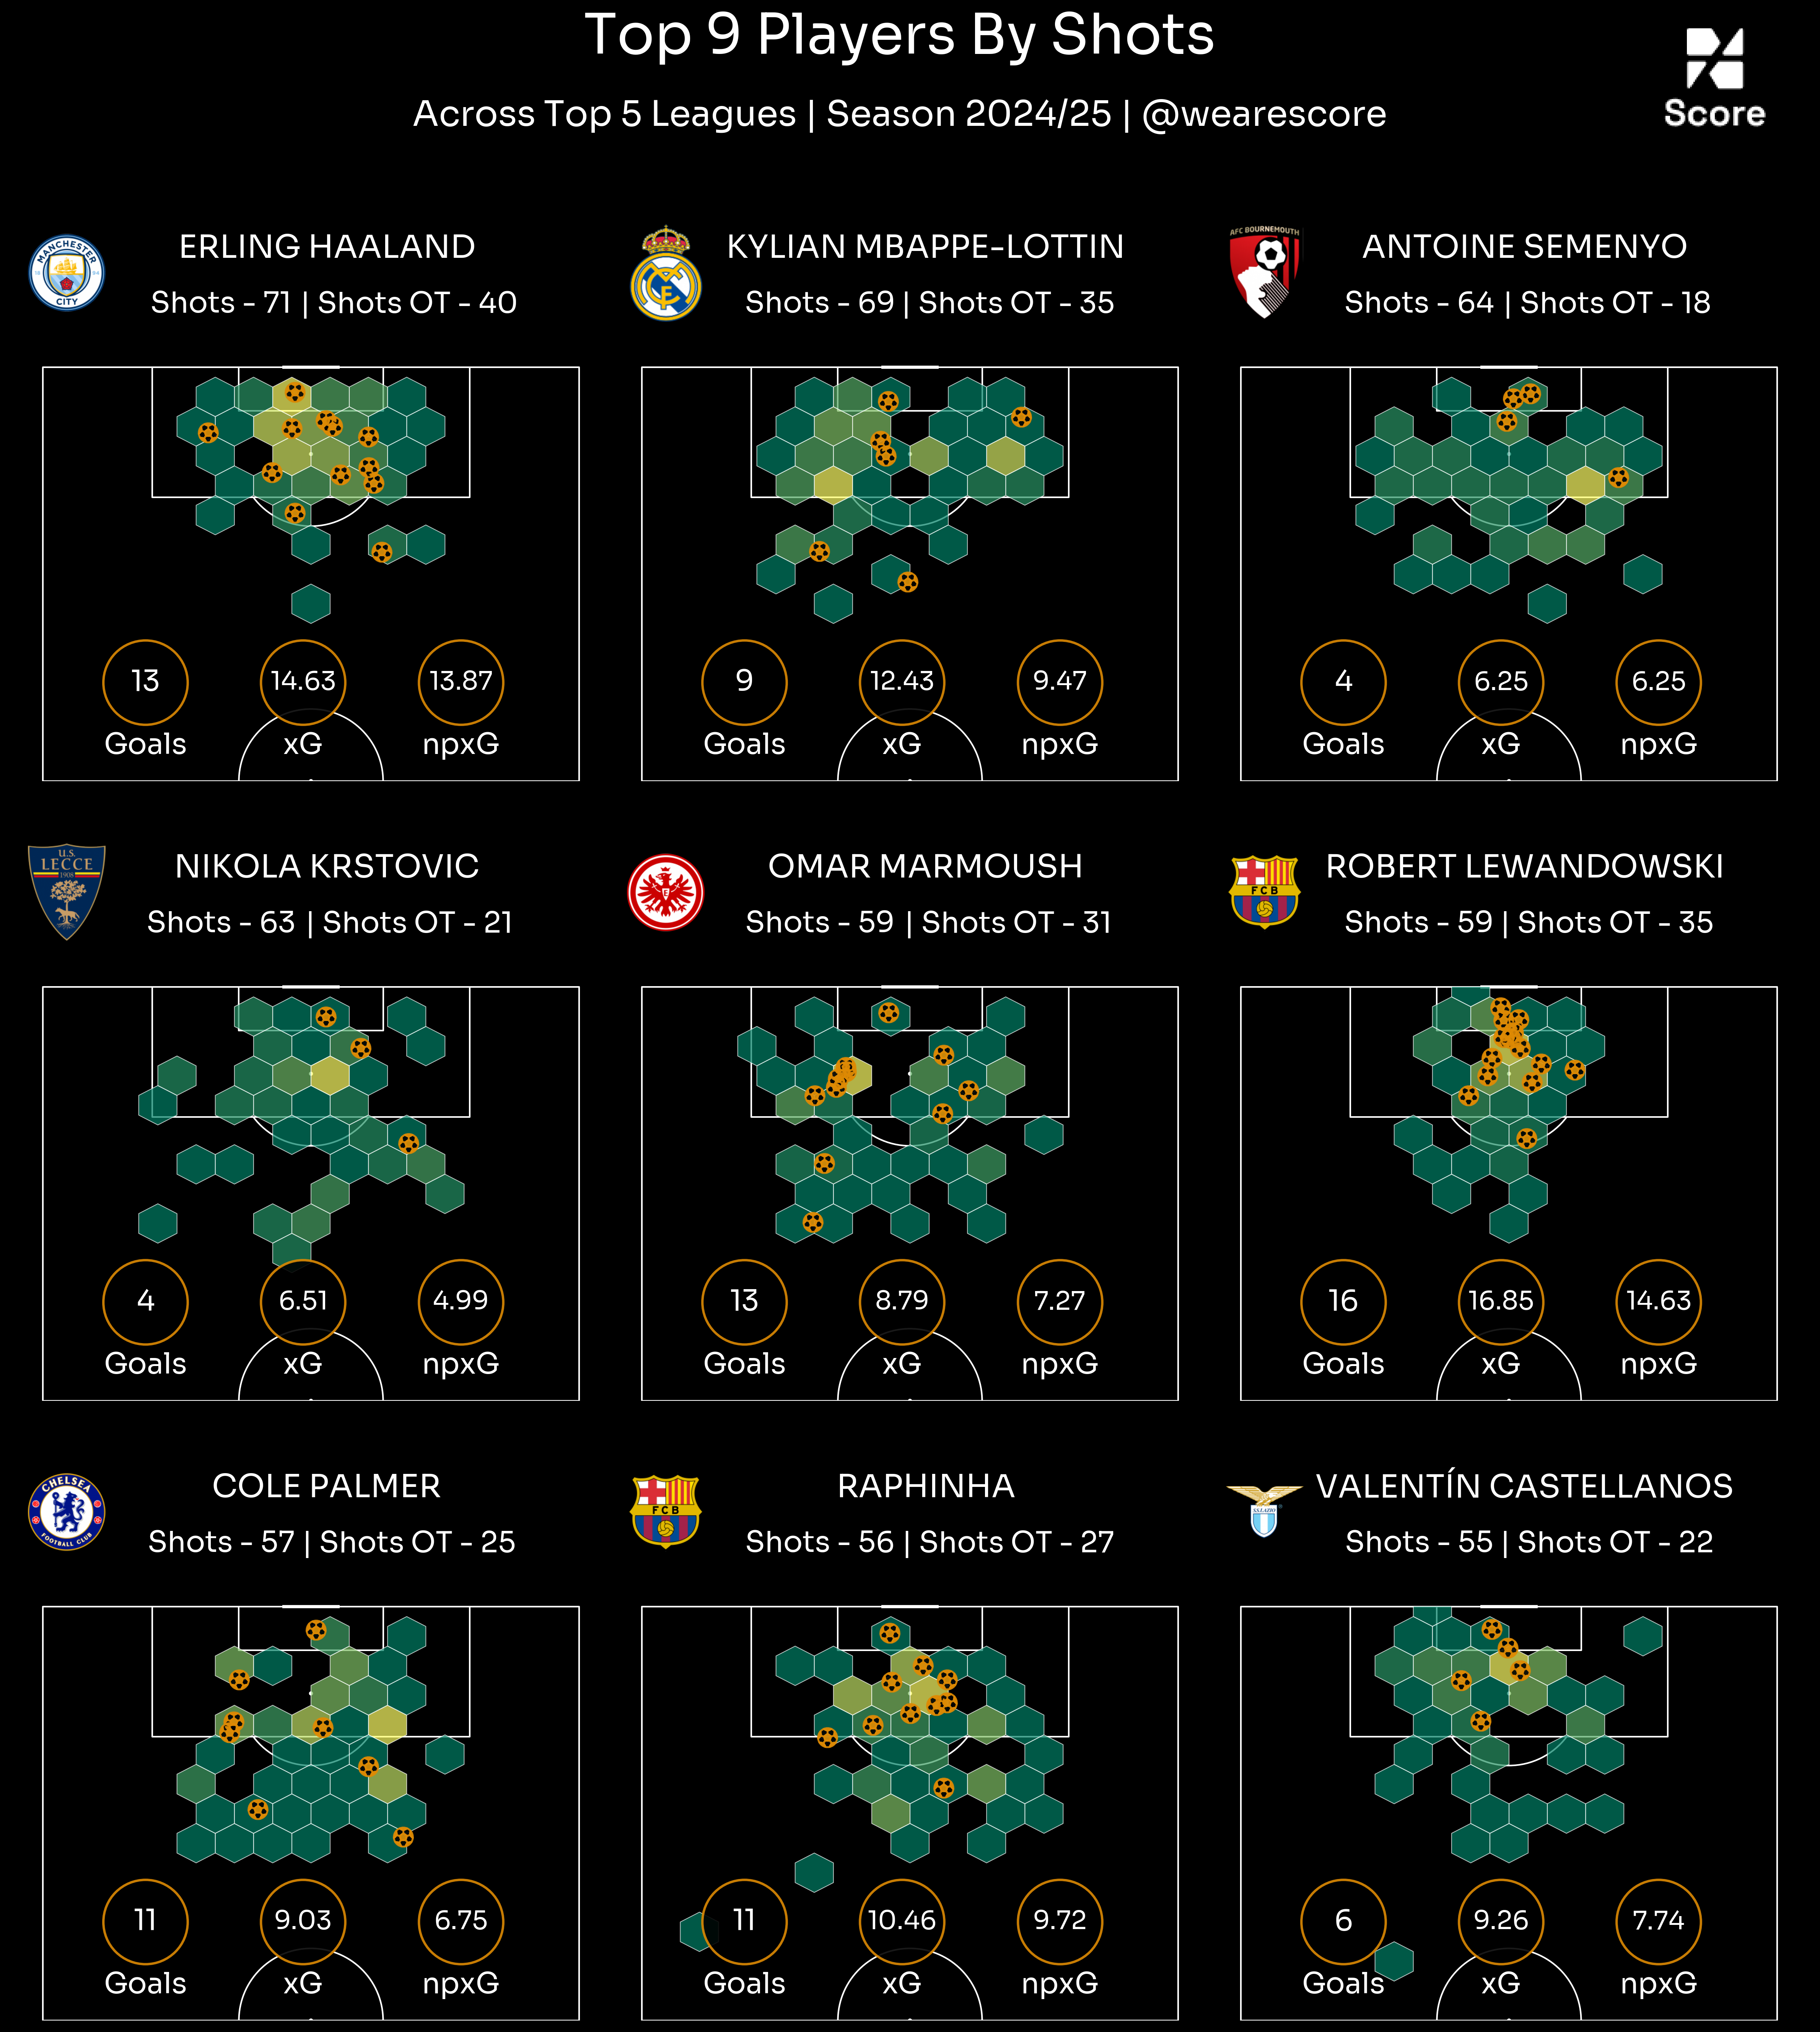

In [780]:
flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                  ['#e3aca7', '#c03a1d'], N=10)
colorlist= mcp.gen_color(cmap='Blues', n=7)
zoom_factor = 0.15

plt.rcParams['hatch.linewidth'] = 0.02
plt.rcParams['font.family'] = 'serif'
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18,30), dpi=300)
axs = axs.flatten()  # Flatten the axis array for easy iteration

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.88, bottom=0.75, width=0.05, height=0.05,aspect='equal'
)

img_url = 'C:\\Users\\acer\\Documents\\GitHub\\IndianCitizen\\ScorePredict\\Images\\TeamLogos'
for index, ax in enumerate(axs):
    pitch = VerticalPitch(
    pitch_type='uefa',
    goal_type = 'line',
    half=True, 
    pitch_color=background, 
    stripe=False, 
    line_color='white',
    linewidth=1,
    line_zorder=2,pad_bottom=0, pad_top=20
    )
    pitch.draw(ax=ax)

    ax.annotate(text=f"{df_stats['player'].iloc[index].upper()}", xy=(32, 120), size=20, color='white', ha='center', va='center', font=font_prop)
    team_name = df_stats['team'].iloc[index]
    img = plt.imread(f"{img_url}\\{team_name}.png")  # Adjust file path as needed
    im = OffsetImage(img, zoom=0.35)  # Adjust zoom for size
    ab = AnnotationBbox(
        im, 
        (65, 117),  # Adjust coordinates for image placement
        frameon=False,
        xycoords='data'
    )
    ax.add_artist(ab)
    
    
    ax.annotate(text=f"Shots - {df_stats['num_shots'].iloc[index]} ", xy=(45, 113), size=18, color='white', ha='center', va='center', font=font_prop)

    ax.annotate(text=f" | Shots OT - {df_stats['num_shots_on_target'].iloc[index]}", xy=(22, 113), size=18, color='white', ha='center', va='center', font=font_prop)

    player_shots = df[df['player'] == df_stats['player'].iloc[index]]

    if not player_shots.empty:
        # Plot hexbin for the player's shots
        pitch.hexbin(
            player_shots.X, 
            player_shots.Y, 
            ax=ax, 
            edgecolors='white',
            gridsize=(14, 14), 
            cmap='summer', 
            alpha=0.7, 
            zorder=3
        )

    player_goals = player_shots[(player_shots['result'] == 'Goal') & (player_shots['situation'] != 'Penalty')]
    pitch.scatter(player_goals.X, player_goals.Y,s=150, ax=ax, zorder=4, edgecolors='#DE8A04',marker='football',
                          alpha=0.9, linewidths=1.2, c=background)

    pitch.scatter(65, 55,s=2800, ax=ax, zorder=4, edgecolors='#DE8A04',alpha=0.9, lw=1.5, color=background)
    pitch.scatter(65, 35,s=2800, ax=ax, zorder=4, edgecolors='#DE8A04',alpha=0.9, lw=1.5, color=background)
    pitch.scatter(65, 15,s=2800, ax=ax, zorder=4, edgecolors='#DE8A04',alpha=0.9, lw=1.5, color=background)

    pitch.annotate(text=f"{df_stats['num_goals'].iloc[index]}",ax=ax, xy=(65, 55), size=18, color='white', ha='center', va='center',zorder=5, font=font_prop)
    pitch.annotate(text="Goals",ax=ax, xy=(57, 55), size=18, color='white', ha='center', va='center',zorder=5, font=font_prop)

    pitch.annotate(text=f"{df_stats['total_xg'].iloc[index]}",ax=ax, xy=(65, 35), size=16, color='white', ha='center', va='center',zorder=5, font=font_prop)
    pitch.annotate(text="xG",ax=ax, xy=(57, 35), size=18, color='white', ha='center', va='center',zorder=5, font=font_prop)

    pitch.annotate(text=f"{df_stats['total_npxg'].iloc[index]}",ax=ax, xy=(65, 15), size=16, color='white', ha='center', va='center',zorder=5, font=font_prop)
    pitch.annotate(text="npxG",ax=ax, xy=(57, 15), size=18, color='white', ha='center', va='center',zorder=5, font=font_prop)


    
    

fig.patch.set_facecolor(background)
plt.subplots_adjust(wspace=0, hspace=-0.6)

fig.text(x=0.51, y=0.78, s=f"Top 9 Players By Shots", va="bottom", ha="center",
             fontsize=35, color="white", font=font_prop, weight="bold")
fig.text(x=0.51, y=0.76, s=f"Across Top 5 Leagues | Season 2024/25 | @wearescore",color="white",
         va="bottom", ha="center", fontsize=22, font=font_prop)

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Top9Europe.png',dpi=500,bbox_inches = 'tight',facecolor=background)


In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cmr.amber', 'cmr.amber_r', 'cmr.amethyst', 'cmr.amethyst_r', 'cmr.apple', 'cmr.apple_r', 'cmr.arctic', 'cmr.arctic_r', 'cmr.bubblegum', 'cmr.bubblegum_r', 'cmr.chroma', 'cmr.chroma_r', 'cmr.copper', 'cmr.copper_r', 'cmr.copper_s', 'cmr.copper_s_r', 'cmr.cosmic', 'cmr.cosmic_r', 'cmr.dusk', 'cmr.dusk_r', 'cmr.eclipse', 'cmr.eclipse_r', 'cmr.ember', 'cmr.ember_r', 'cmr.emerald', 'cmr.emerald_r', 'cmr.emergency', 'cmr.emergency_r', 'cmr.emergency_s', 'cmr.emergency_s_r', 'cmr.fall', 'cmr.fall_r', 'cmr.flamingo', 'cmr.flamingo_r', 'cmr.freeze', 'cmr.freeze_r', 'cmr.fusion', 'cmr.fusion_r', 'cmr.gem', 'cmr.gem_r', 'cmr.ghostlight', 'cmr.ghostlight_r', 'cmr.gothic', 'cmr.gothic_r', 'cmr.guppy', 'cmr.guppy_r', 'cmr.holly', 'cmr.holly_r', 'cmr.horizon', 'cmr.horizon_r', 'cmr.iceburn', 'cmr.iceburn_r', 'cmr.infinity', 'cmr.infinity_r', 'cmr.infinity_s', 'cmr.infinity_s_r', 'cmr.jungle', 'cmr.jungle_r', 'cmr.lavender', 'cmr.lavender_r', 'cmr.lilac', 'cmr.lilac_r', 'cmr.neon', 'cmr.neon_r', 'cmr.neutral', 'cmr.neutral_r', 'cmr.nuclear', 'cmr.nuclear_r', 'cmr.ocean', 'cmr.ocean_r', 'cmr.pepper', 'cmr.pepper_r', 'cmr.pride', 'cmr.pride_r', 'cmr.prinsenvlag', 'cmr.prinsenvlag_r', 'cmr.rainforest', 'cmr.rainforest_r', 'cmr.redshift', 'cmr.redshift_r', 'cmr.sapphire', 'cmr.sapphire_r', 'cmr.savanna', 'cmr.savanna_r', 'cmr.seasons', 'cmr.seasons_r', 'cmr.seasons_s', 'cmr.seasons_s_r', 'cmr.seaweed', 'cmr.seaweed_r', 'cmr.sepia', 'cmr.sepia_r', 'cmr.sunburst', 'cmr.sunburst_r', 'cmr.swamp', 'cmr.swamp_r', 'cmr.torch', 'cmr.torch_r', 'cmr.toxic', 'cmr.toxic_r', 'cmr.tree', 'cmr.tree_r', 'cmr.tropical', 'cmr.tropical_r', 'cmr.viola', 'cmr.viola_r', 'cmr.voltage', 'cmr.voltage_r', 'cmr.waterlily', 'cmr.waterlily_r', 'cmr.watermelon', 'cmr.watermelon_r', 'cmr.wildfire', 'cmr.wildfire_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

## Scatter Plots for Different Metrics

In [526]:
#https://x.com/DataAnalyticEPL/status/1869757409042006186

## Radar / Pizza Plots